In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from tqdm import tqdm

import sys
sys.path.append('../')
from tracker import loadAntData, pltsaveall, discretizeTrajectory

# Update source files before running each cell
%load_ext autoreload
%autoreload 2

From tracker/_init__.py:
SLEAP not detected; make sure to install SLEAP if intending to use postprocessing notebook. Otherwise, ignore this message.


In [2]:
dataFile = '/home/jack/Workspaces/data/ant_tracking/ant_dataset_1_2026-01-01.h5'

# We will want to look at longer trajectories here since we want to examine
# timescales longer than 10 seconds.
minimumLength = 10 # seconds
smoothingWindow = 10 # frames
maximumTimeSkip = 10 # frames

excludeOutliers = True
excludeShortSegments = True
excludeObjects = True

padding = None # mm
inversePadding = None # mm

dataArr, timeArr, metadataArr = loadAntData(dataFile, minimumLength=minimumLength,
                                            smoothingWindow=smoothingWindow, maximumTimeSkip=maximumTimeSkip,
                                            excludeOutliers=excludeOutliers, excludeShortSegments=excludeShortSegments,
                                            excludeObjects=excludeObjects,
                                            borderPadding=padding, inverseBorderPadding=inversePadding,
                                            debug=True)

Loading SLEAP data: 100%|██████████████████| 1434/1434 [00:01<00:00, 930.40it/s]


Loaded 398 segments!


## Examine the discretization process at each step

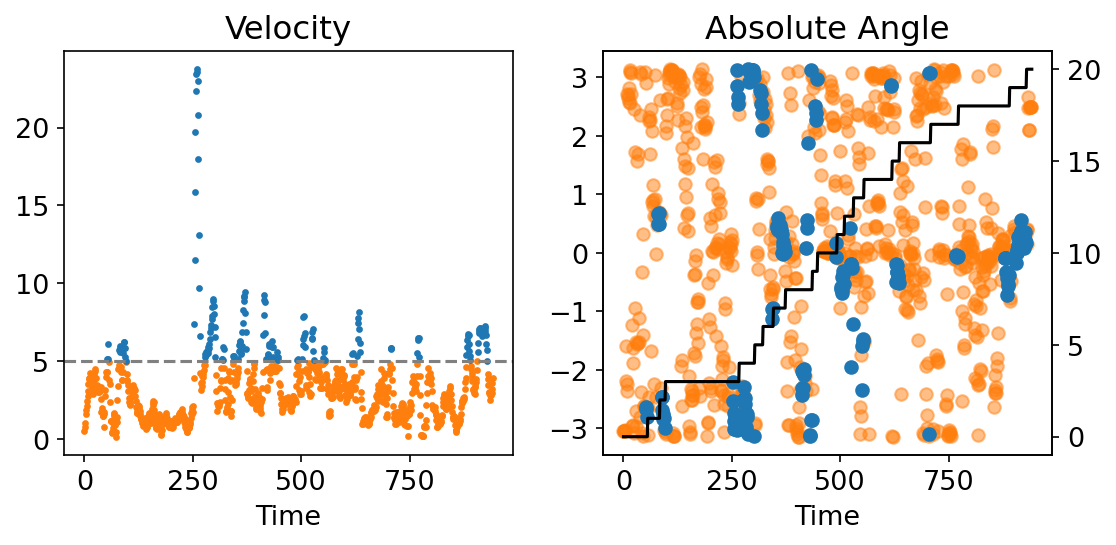

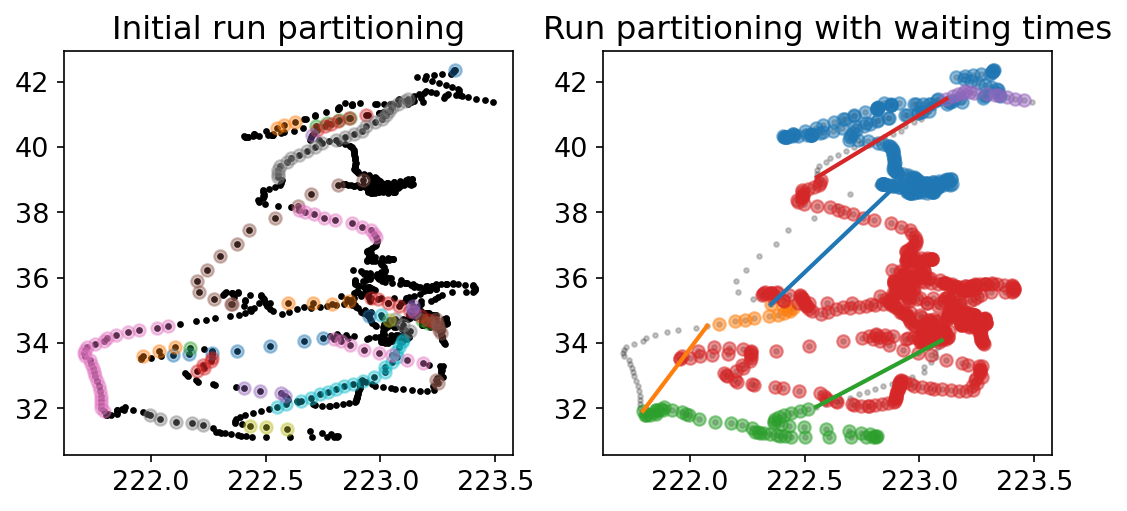

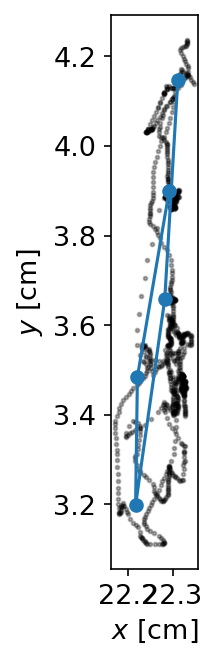

In [3]:
# The index of the segment to examine
index = 0

crop = 2000
angleThreshold = 0.65 # colinearity, [0, 1]
velocityThreshold = 5 # mm/s
minDistancePerRun = 1 # mm
minStepsPerRun = 5 # frames

discreteTraj, waitingTimes, runTimes = discretizeTrajectory(dataArr[index][:crop],
                                                            c=angleThreshold,
                                                            velocityThreshold=velocityThreshold,
                                                            dt=1/metadataArr[index]["fps"],
                                                            minSteps=minStepsPerRun,
                                                            minDistancePerRun=minDistancePerRun,
                                                            debug=True)

plt.plot(*(discreteTraj / 10).T, '-o')
plt.scatter(*(dataArr[index][:crop] / 10).T, alpha=0.3, s=3, c='black')
plt.xlabel('$x$ [cm]')
plt.ylabel('$y$ [cm]')
plt.gca().set_aspect(1)
plt.show()

## Examine example discretizations

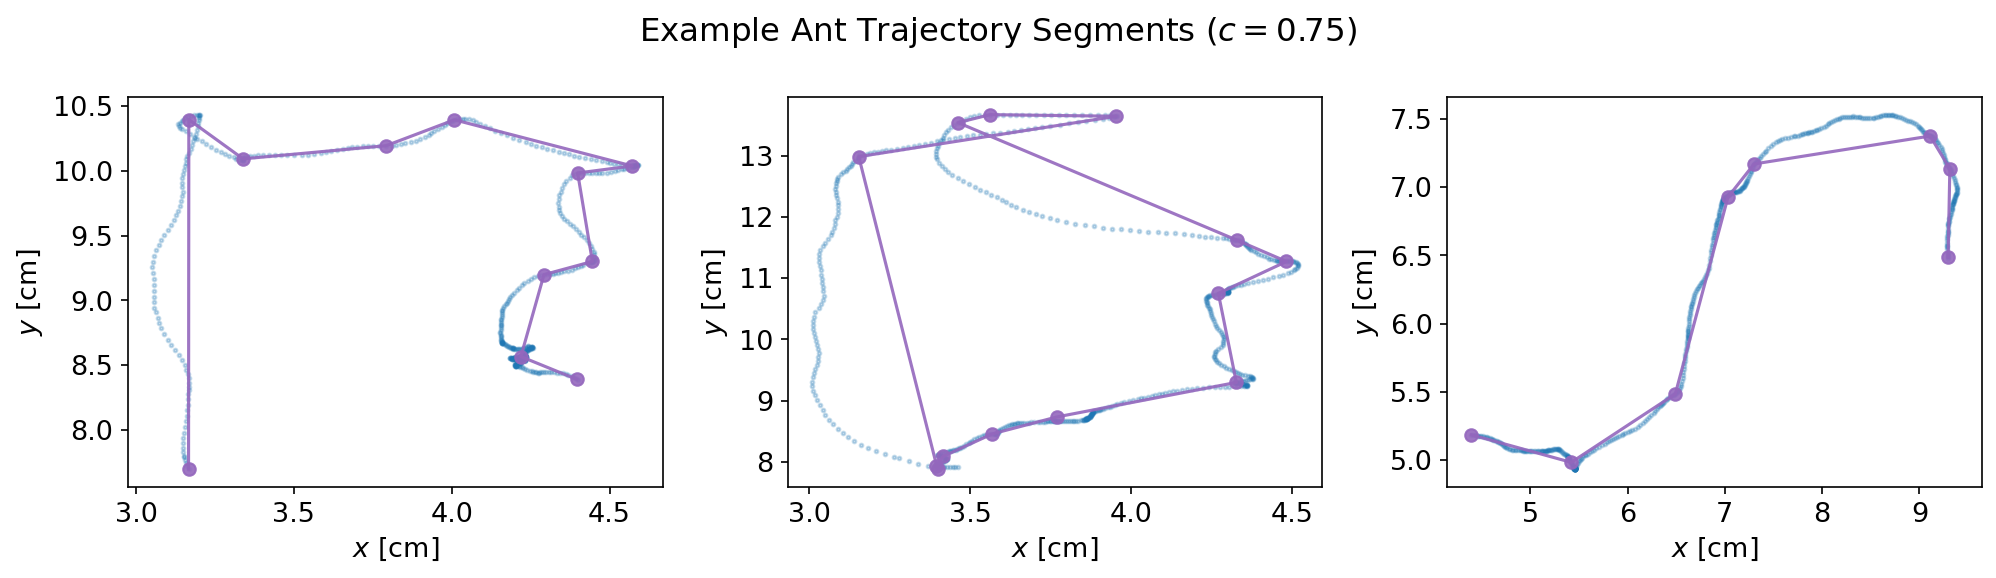

In [84]:
testIndices = [-47, -50, -44]
angleThreshold = 0.75 # colinearity, [0, 1]
velocityThreshold = 3 # mm/s
minDistancePerRun = 1 # mm
minStepsPerRun = 5 # frames

fig, ax = plt.subplots(1, len(testIndices), figsize=(len(testIndices)*4.5, 3.5))

for i in range(len(testIndices)):
    
    discreteTraj, waitingTimes, runTimes = discretizeTrajectory(dataArr[testIndices[i]],
                                                                c=angleThreshold,
                                                                velocityThreshold=velocityThreshold,
                                                                dt=1/metadataArr[testIndices[i]]["fps"],
                                                                minSteps=minStepsPerRun,
                                                                minDistancePerRun=minDistancePerRun,
                                                                debug=False)

    ax[i].scatter(*(dataArr[testIndices[i]]/10).T, s=3, alpha=0.25, rasterized=True)

    ax[i].plot(*discreteTraj.T / 10, '-o', alpha=0.9, c='tab:purple')

#    ax[i].set_xlim([2, 23.5])
#    ax[i].set_ylim([0, 14.5])
#    ax[i].set_aspect(1)
    ax[i].set_xlabel('$x$ [cm]')
    ax[i].set_ylabel('$y$ [cm]')

fig.tight_layout()
fig.suptitle(f'Example Ant Trajectory Segments ($c = {angleThreshold}$)', y=1.1)
pltsaveall('07_ExampleSegments')
plt.show()

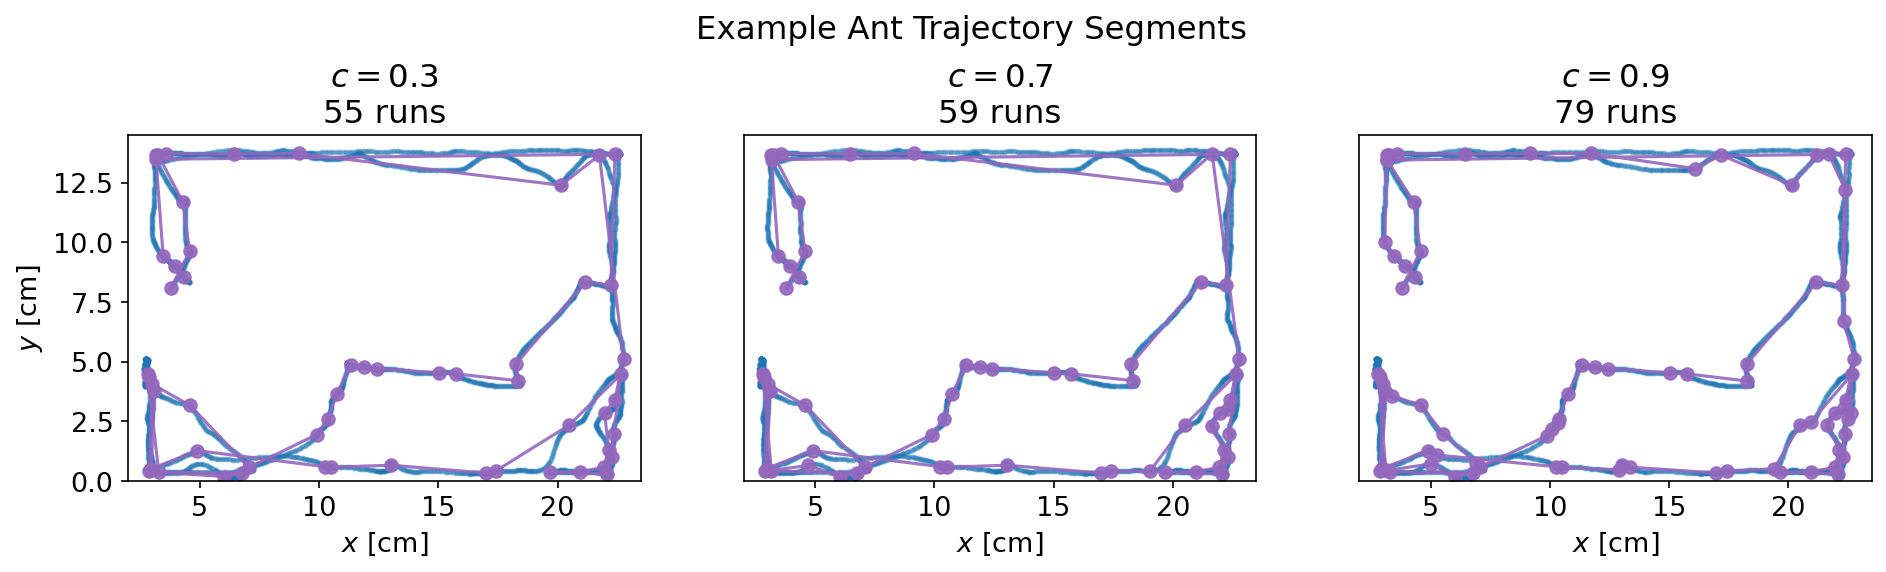

In [87]:
testIndex = 200
angleThresholdArr = [0.3, 0.7, 0.9] # colinearity, [0, 1]
velocityThreshold = 10 # mm/s

cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig, ax = plt.subplots(1, len(angleThresholdArr), figsize=(len(angleThresholdArr)*5, 4.5))

for i in range(len(angleThresholdArr)):

    discreteTraj, waitingTimes, runTimes = discretizeTrajectory(dataArr[testIndex],
                                                                c=angleThresholdArr[i],
                                                                velocityThreshold=velocityThreshold,
                                                                dt=1/metadataArr[testIndices[i]]["fps"],
                                                                minSteps=minStepsPerRun,
                                                                minDistancePerRun=minDistancePerRun,
                                                                debug=False)

    ax[i].scatter(*(dataArr[testIndex]/10).T, s=3, alpha=0.25, rasterized=True)

    ax[i].plot(*discreteTraj.T / 10, '-o', alpha=0.9, c='tab:purple')

    ax[i].set_title(f'$c = {angleThresholdArr[i]}$\n{len(runTimes)} runs')
    ax[i].set_xlim([2, 23.5])
    ax[i].set_ylim([0, 14.5])
    ax[i].set_aspect(1)
    ax[i].set_xlabel('$x$ [cm]')
    if i > 0:
        ax[i].set_yticks([])
    else:
        ax[i].set_ylabel('$y$ [cm]')

#fig.tight_layout()
fig.suptitle(f'Example Ant Trajectory Segments', y=0.93)
pltsaveall('07_ExampleSegmentsColinearity')
plt.show()